In [1]:
from engines import SearchEngineOpenSearch
from crawler import WebCrawler
from graph import DomainGraph, PageRank
from preprocessor import Preprocessor
from utils import extract_documents_from_crawled_data, is_same_domain
from vector_space import VectorSpace

## Constants
- `LIMIT` for number of results to show as well as crawl
- `DEPTH` for depth of crawling, how deep from a parent website to crawl
- `EPSILON` is the damping factor

In [3]:
LIMIT = 20
DEPTH = 1
EPSILON = 0.85

## Initialisation 

In [4]:
searcher = SearchEngineOpenSearch(limit=LIMIT)
crawler = WebCrawler(depth=DEPTH)
graph = DomainGraph()
pre_processor = Preprocessor()
vsm = VectorSpace()

## Query
User inputs the query. Its better to have a long descriptive query to get better results.

In [5]:
query = input("Enter a query: ")
print("Searching for query : ", query)

Searching for query :  impact of ai on future software job roles


## Crawling

In [6]:
all_data, links = searcher.search(query)
crawled_data = [crawler.crawl(links)]

Crawling: https://brainhub.eu/library/software-developer-age-of-ai Depth: 0
Crawling: https://www.youtube.com/playlist?list=PLx3I5U3RM4yAU9PLbvjS2lNxjEXY__bK9 Depth: 1
Skipping link (same domain): https://www.youtube.com/about/
Skipping link (same domain): https://www.youtube.com/about/press/
Skipping link (same domain): https://www.youtube.com/about/copyright/
Skipping link (same domain): https://www.youtube.com/creators/
Skipping link (same domain): https://www.youtube.com/ads/
Skipping link (same domain): https://www.youtube.com/about/policies/
Skipping link (same domain): https://www.youtube.com/howyoutubeworks?utm_campaign=ytgen&amp;utm_source=ythp&amp;utm_medium=LeftNav&amp;utm_content=txt&amp;u=https%3A%2F%2Fwww.youtube.com%2Fhowyoutubeworks%3Futm_source%3Dythp%26utm_medium%3DLeftNav%26utm_campaign%3Dytgen
Skipping link (same domain): https://brainhub.eu/guides/software-development-use-cases
Crawling: https://career.brainhub.eu/ Depth: 1
Skipping link (same domain): https://care

## Network graph

Graph for the query :  how to make pasta


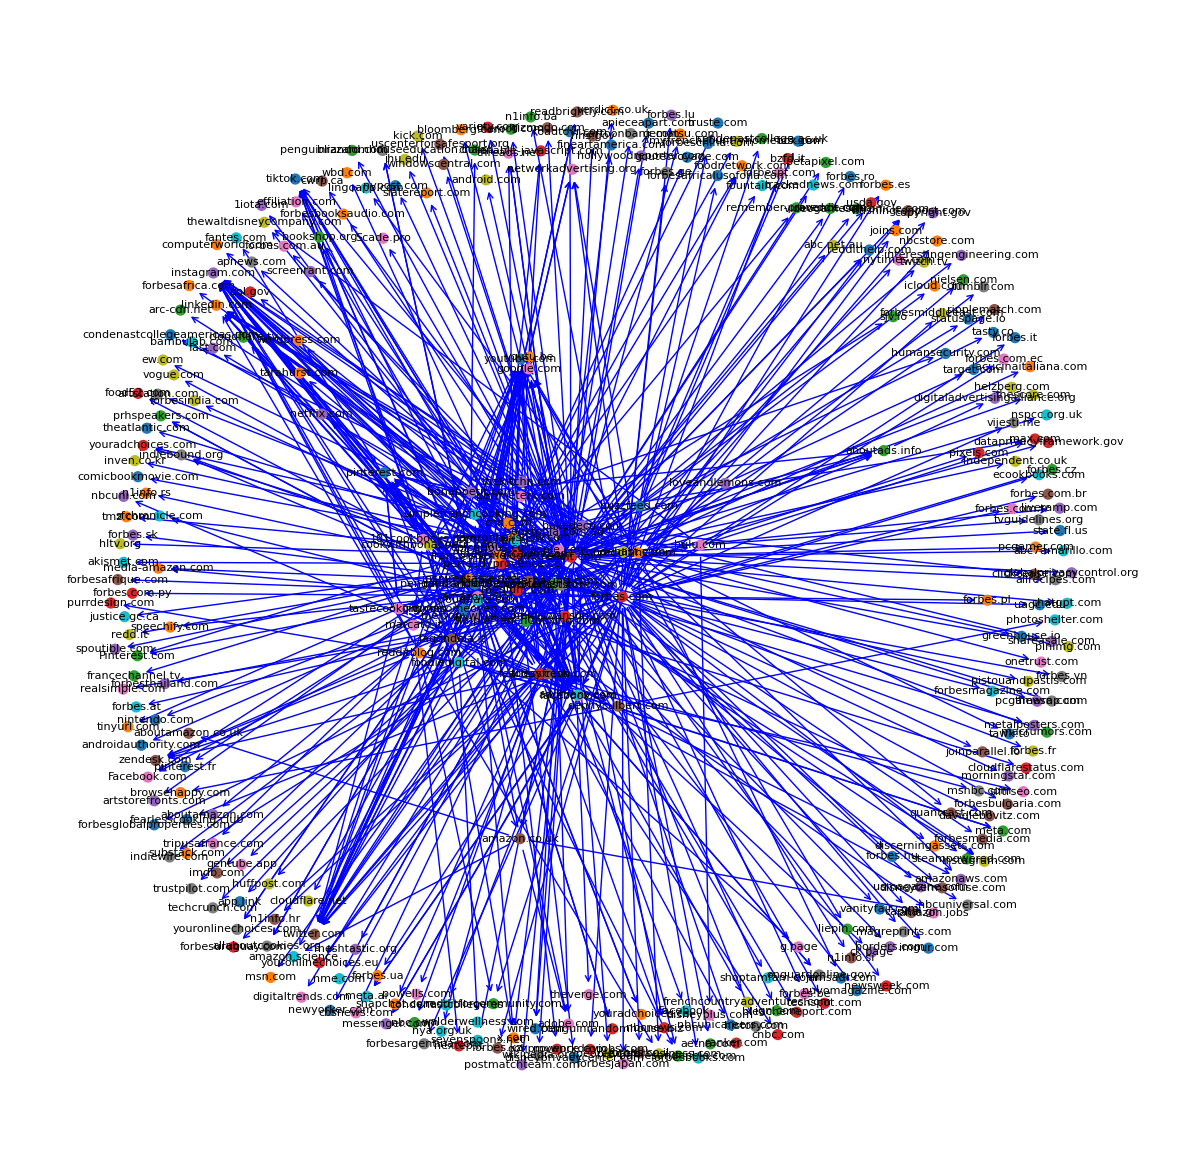

In [9]:
print("Graph for the query : ", query)
graph.draw_from_json(crawled_data)

Graph for the query :  nuclear bomb


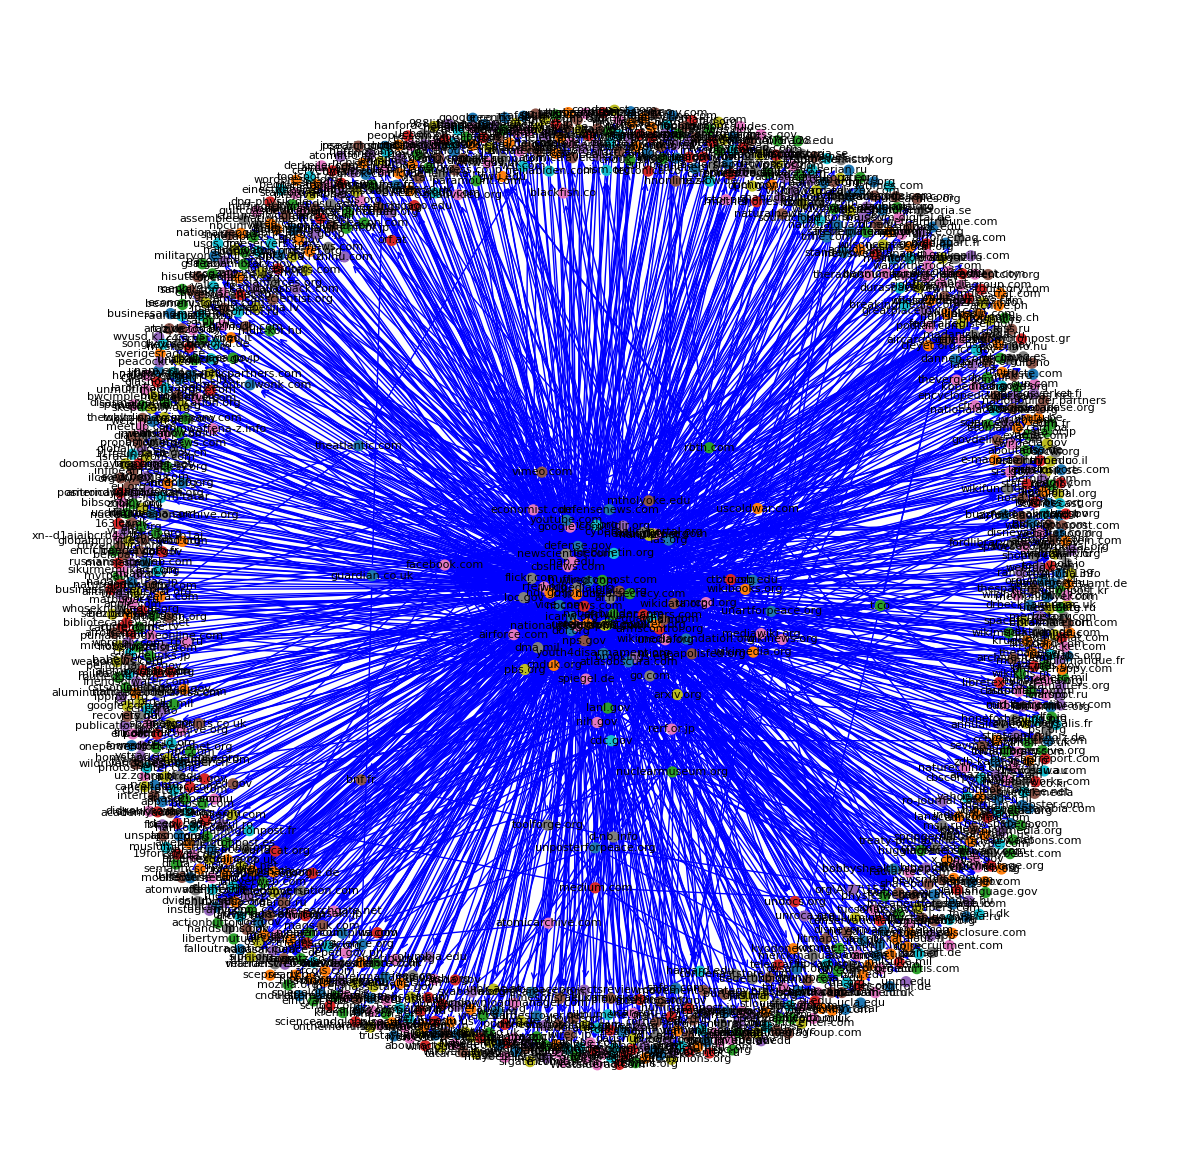

In [16]:
print("Graph for the query : ", query)
graph.draw_from_json(crawled_data)

Graph for the query :  impact of ai on future software job roles


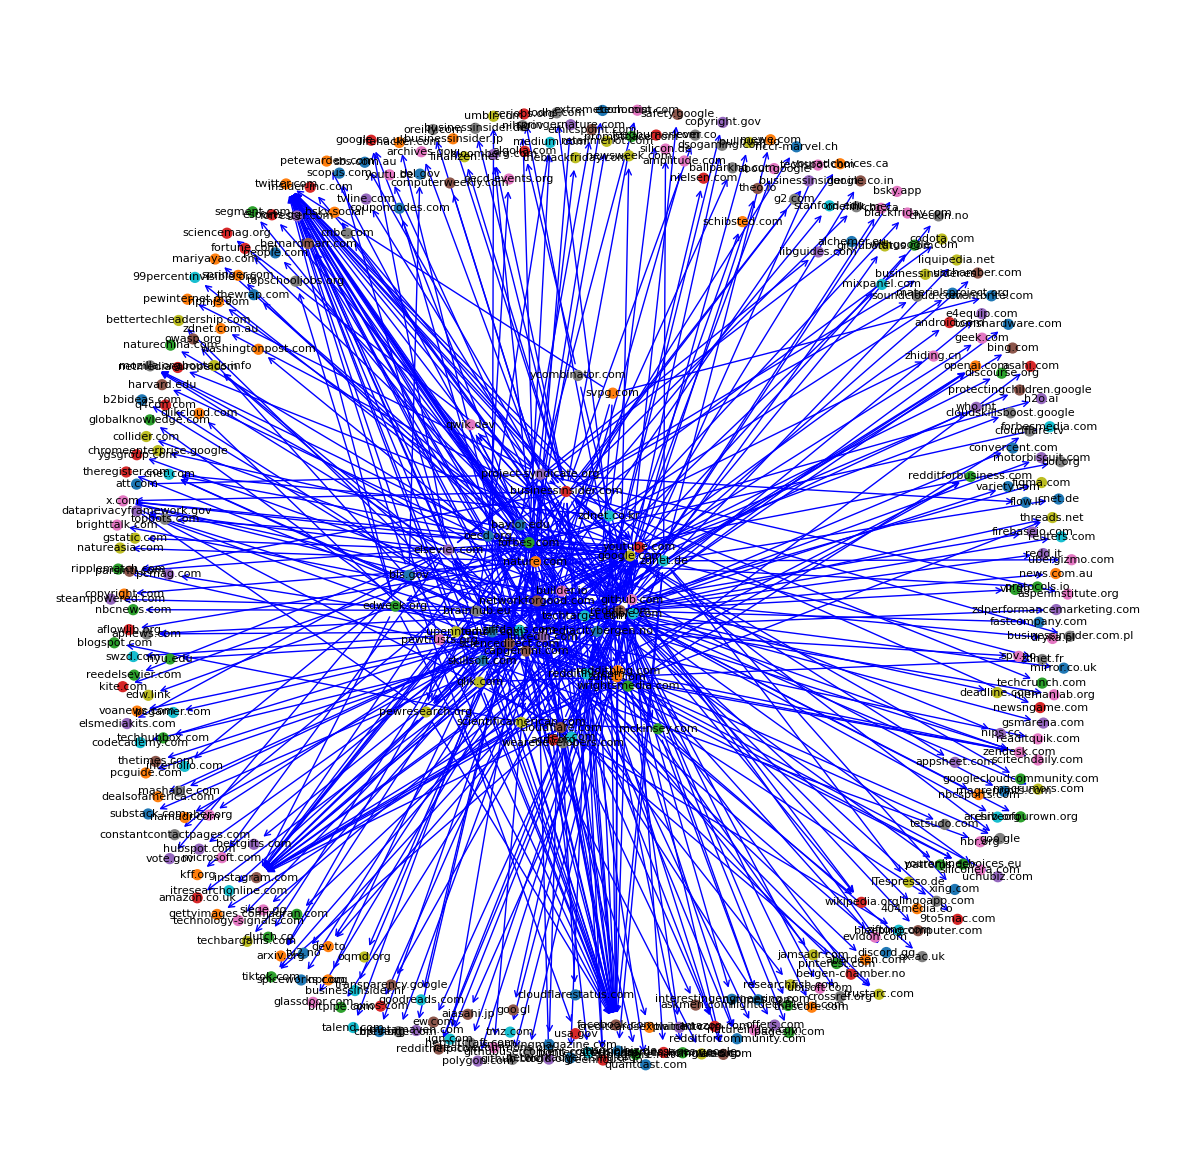

In [7]:
print("Graph for the query : ", query)
graph.draw_from_json(crawled_data)

## PageRank
PageRank is calculated here and we use `node_labels` to remember the page links and their respective PageRank values.

In [8]:
# page_rank = PageRank(graph.return_graph_matrix(), epsilon=EPSILON)
page_rank = PageRank(graph_matrix=graph.return_graph_matrix(), epsilon=EPSILON,node_labels=graph.get_node_labels())
print("Graph Matrix : \n", graph.return_graph_matrix())

Graph Matrix : 
 [[0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
print("Normalized Graph Matrix : \n", page_rank.normalize_matrix())

Normalized Graph Matrix : 
 [[0.00254491 0.00810047 0.07754491 ... 0.00254491 0.00254491 0.00254491]
 [0.00254491 0.00254491 0.00254491 ... 0.00254491 0.00254491 0.00254491]
 [0.00254491 0.00254491 0.00254491 ... 0.00254491 0.00254491 0.00254491]
 ...
 [0.00254491 0.00254491 0.00254491 ... 0.00254491 0.00254491 0.00254491]
 [0.00254491 0.00254491 0.00254491 ... 0.00254491 0.00254491 0.00254491]
 [0.00254491 0.00254491 0.00254491 ... 0.00254491 0.00254491 0.00254491]]


In [10]:
print("Page Rank : ", page_rank.get_pagerank())
calculated_page_rank = page_rank.get_pagerank()

Page Rank :  {'brainhub.eu': np.float64(0.0044264743112240445), 'linkedin.com': np.float64(0.005295914244285452), 'arxiv.org': np.float64(0.002047141583116528), 'bettertechleadership.com': np.float64(0.002047141583116528), 'g2.com': np.float64(0.002047141583116528), 'twitter.com': np.float64(0.002047141583116528), 'youtube.com': np.float64(0.0021486330983951857), 'clutch.co': np.float64(0.002047141583116528), 'github.com': np.float64(0.006211270963915816), 'facebook.com': np.float64(0.002047141583116528), 'forbes.com': np.float64(0.0073057273540620485), 'instagram.com': np.float64(0.002047141583116528), 'medium.com': np.float64(0.002047141583116528), 'acm.org': np.float64(0.0022016573671381633), 'hiringlab.org': np.float64(0.002047141583116528), 'google.com': np.float64(0.008101443793002993), 'cloudflare.com': np.float64(0.0030835113062064757), 'h2o.ai': np.float64(0.002047141583116528), 'metamaven.com': np.float64(0.002047141583116528), 'nips.cc': np.float64(0.002047141583116528), 'pa

In [11]:
documents = extract_documents_from_crawled_data(crawled_data[0])
all_documents = {doc_id: pre_processor.preprocess(doc) for doc_id, doc in documents.items()}
pre_processed_query = pre_processor.preprocess(query)

## Vector Space
We use `set_docs` to send the documents to consider and then `search` function to get the results.

In [12]:
vsm.set_docs(all_documents)
results = vsm.search(pre_processed_query)


Top relevant documents (including zero scores):
Document: https://cloud.google.com/blog/products/ai-machine-learning/how-ai-impacts-software-development, Cosine Similarity Score: 0.0384
Document: https://www.zdnet.com/education/professional-development/from-ai-trainers-to-ethicists-ai-may-obsolete-some-jobs-but-generate-new-ones/, Cosine Similarity Score: 0.0319
Document: https://www.svpg.com/preparing-for-the-future/, Cosine Similarity Score: 0.0313
Document: https://www.linkedin.com/pulse/what-happens-software-jobs-rise-generative-ai-sachin-gupta, Cosine Similarity Score: 0.0313
Document: https://www.quora.com/Will-Devin-the-AI-software-engineer-effect-the-jobs-of-software-engineers, Cosine Similarity Score: 0.0299
Document: https://news.ycombinator.com/item?id=40762677, Cosine Similarity Score: 0.0286
Document: https://www.builder.io/blog/ai-jobs-truth, Cosine Similarity Score: 0.0285
Document: https://www.pewresearch.org/internet/2014/08/06/future-of-jobs/, Cosine Similarity Score

In [19]:
print("Results : ")
for doc_id, score in results:
    print(doc_id, " : ", score)
calculated_page_rank = {k: float(v) for k, v in calculated_page_rank.items()}

print("\nPage Rank : ")
for doc_id, score in calculated_page_rank.items():
    print(doc_id, " : ", score)

final_results = {}
for doc_id, score in results:
    for link, rank in calculated_page_rank.items():
        if is_same_domain(link, doc_id):
            final_results[doc_id] = score + rank

final_results = dict(sorted(final_results.items(), key=lambda x: x[1], reverse=True))


Results : 
https://cloud.google.com/blog/products/ai-machine-learning/how-ai-impacts-software-development  :  0.03844541299864308
https://www.zdnet.com/education/professional-development/from-ai-trainers-to-ethicists-ai-may-obsolete-some-jobs-but-generate-new-ones/  :  0.03194183267542794
https://www.svpg.com/preparing-for-the-future/  :  0.03133037325153661
https://www.linkedin.com/pulse/what-happens-software-jobs-rise-generative-ai-sachin-gupta  :  0.03131953752883654
https://www.quora.com/Will-Devin-the-AI-software-engineer-effect-the-jobs-of-software-engineers  :  0.029889779116447506
https://news.ycombinator.com/item?id=40762677  :  0.028555619665229657
https://www.builder.io/blog/ai-jobs-truth  :  0.028522659985528658
https://www.pewresearch.org/internet/2014/08/06/future-of-jobs/  :  0.025907304925348075
https://onlinecs.baylor.edu/news/will-ai-replace-SWEs  :  0.02482051396954991
https://brainhub.eu/library/software-developer-age-of-ai  :  0.023927217339057307
https://www.mckin

## Final Results

In [20]:
for doc_id, score in final_results.items():
    print(doc_id, " : ", score)

https://cloud.google.com/blog/products/ai-machine-learning/how-ai-impacts-software-development  :  0.04654685679164608
https://www.zdnet.com/education/professional-development/from-ai-trainers-to-ethicists-ai-may-obsolete-some-jobs-but-generate-new-ones/  :  0.0404742849345178
https://www.linkedin.com/pulse/what-happens-software-jobs-rise-generative-ai-sachin-gupta  :  0.03661545177312199
https://www.reddit.com/r/singularity/comments/18lj7mu/will_software_engineering_and_it_job_market_be/  :  0.03572780208349137
https://www.svpg.com/preparing-for-the-future/  :  0.03441480994140325
https://www.builder.io/blog/ai-jobs-truth  :  0.034101556497050954
https://news.ycombinator.com/item?id=40762677  :  0.031066134532776776
https://www.forbes.com/sites/sylvainduranton/2024/04/15/are-coders-jobs-at-risk-ais-impact-on-the-future-of-programming/  :  0.030223207748957398
https://www.pewresearch.org/internet/2014/08/06/future-of-jobs/  :  0.02898149360396628
https://onlinecs.baylor.edu/news/will-a